# 5章 モデルの評価と改良

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x, y = make_blobs(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

logreg = LogisticRegression().fit(x_train, y_train)
print("Test set score: {:.2f}".format(logreg.score(x_test, y_test)))

Test set score: 0.88


## 5.1 交差検証

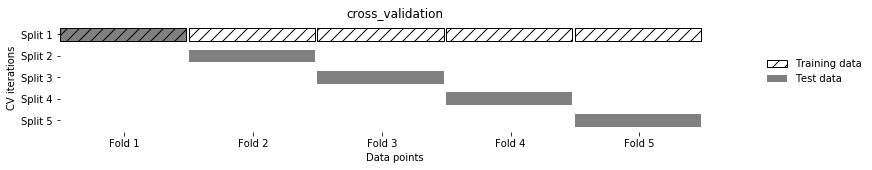

In [5]:
%matplotlib inline

import mglearn
import matplotlib.pyplot as plt
import numpy as np

# mglearn.plots.plot_cross_validation()

def plot_cross_validation():
    plt.figure(figsize=(12, 2))
    plt.title("cross_validation")
    axes = plt.gca()
    axes.set_frame_on(False)

    n_folds = 5
    n_samples = 25

    n_samples_per_fold = n_samples / float(n_folds)

    for i in range(n_folds):
        colors = ["w"] * n_folds
        colors[i] = "grey"
        bars = plt.barh(
            y=range(n_folds), width=[n_samples_per_fold - 0.1] * n_folds,
            left=i * n_samples_per_fold, height=.6, color=colors, hatch="//",
            edgecolor='k', align='edge')
    axes.invert_yaxis()
    axes.set_xlim(0, n_samples + 1)
    plt.ylabel("CV iterations")
    plt.xlabel("Data points")
    plt.xticks(np.arange(n_samples_per_fold / 2., n_samples,
                         n_samples_per_fold),
               ["Fold %d" % x for x in range(1, n_folds + 1)])
    plt.yticks(np.arange(n_folds) + .3,
               ["Split %d" % x for x in range(1, n_folds + 1)])
    plt.legend([bars[0], bars[4]], ['Training data', 'Test data'],
               loc=(1.05, 0.4), frameon=False)
    
plot_cross_validation()

### 5.1.1 scikit-learnでの交差検証

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.96078431  0.92156863  0.95833333]


In [7]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 1.          0.96666667  0.93333333  0.9         1.        ]


In [8]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


### 5.1.2 交差検証の利点
### 5.1.3 層化k分割交差検証と他の戦略

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:121: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color=colors, hatch="//", edgecolor='k', align='edge')
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:125: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align='edge')
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:158: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  height=.6, color="grey", hatch="//", edgecolor='k', align='edge')
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/

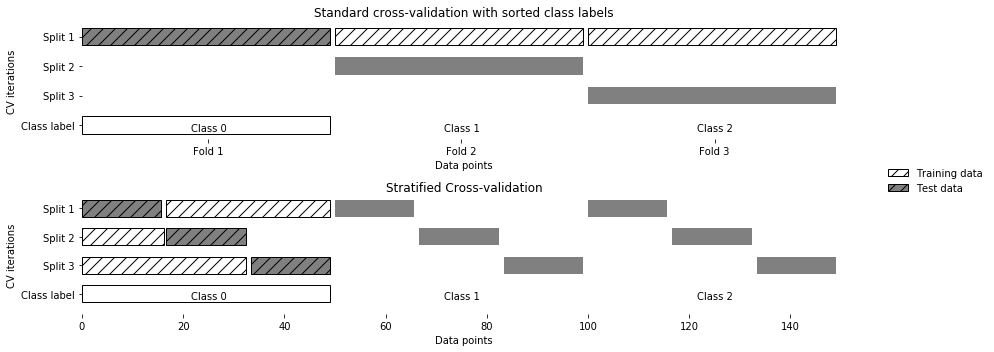

In [10]:
mglearn.plots.plot_stratified_cross_validation()

#### 5.1.3.1 交差検証のより詳細な制御

In [11]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [12]:
kfold = KFold(n_splits=3)

print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 0.  0.  0.]


In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 0.9   0.96  0.96]


#### 5.1.3.2 1つ抜き交差検証

In [15]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


#### 5.1.3.3 シャッフル分割交差検証

/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:85: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor='k', align='edge')


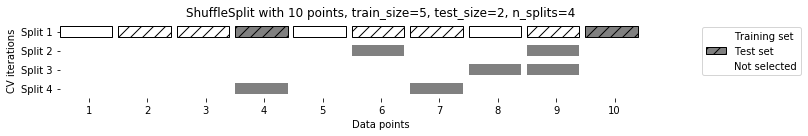

In [16]:
mglearn.plots.plot_shuffle_split()

In [19]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)

scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.90666667  0.97333333  0.98666667  0.85333333  0.94666667  0.97333333
  0.92        0.94666667  0.92        0.98666667]


#### 5.1.3.4 グループ付き交差検証

In [21]:
from sklearn.model_selection import GroupKFold

x, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, x, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.75        0.8         0.66666667]


/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:33: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor="k", align='edge')
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:39: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align="edge")


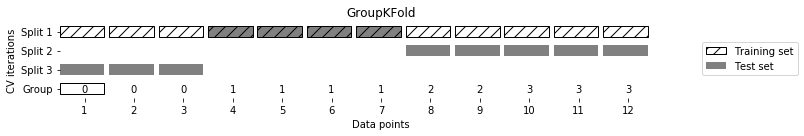

In [23]:
mglearn.plots.plot_group_kfold()

## 5.2 グリッドサーチ
### 5.2.1 単純なグリッドサーチ

In [25]:
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print("Size of training set: {}\nsize of test set: {}".format(x_train.shape[0], x_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=c)
        svm.fit(x_train, y_train)
        score = svm.score(x_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {"C": c, "gamma": gamma}
            
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112
size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### 5.2.2 パラメータの過剰適合の危険性と検証セット

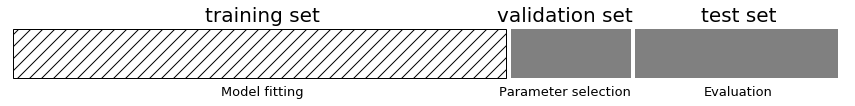

In [28]:
mglearn.plots.plot_threefold_split()

In [29]:
x_trainval, x_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, random_state=1)

print("Size of training set: {}\nsize of validation set: {}\nsize of test set: {}".format(x_train.shape[0], x_valid.shape[0], x_test.shape[0]))

Size of training set: 84
size of validation set: 28
size of test set: 38


In [30]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=c)
        svm.fit(x_train, y_train)
        score = svm.score(x_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {"C": c, "gamma": gamma}
            
svm = SVC(**best_parameters)
svm.fit(x_trainval, y_trainval)
test_score = svm.score(x_test, y_test)
            
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [31]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=c)
        scores = cross_val_score(svm, x_trainval, y_trainval, cv=5)
        score = scores.mean()
        if score > best_score:
            best_score = score
            best_parameters = {"C": c, "gamma": gamma}
            
svm = SVC(**best_parameters)
svm.fit(x_trainval, y_trainval)
test_score = svm.score(x_test, y_test)
            
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.97
Best parameters: {'C': 100, 'gamma': 0.01}
Test set score with best parameters: 0.97


/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=Tru

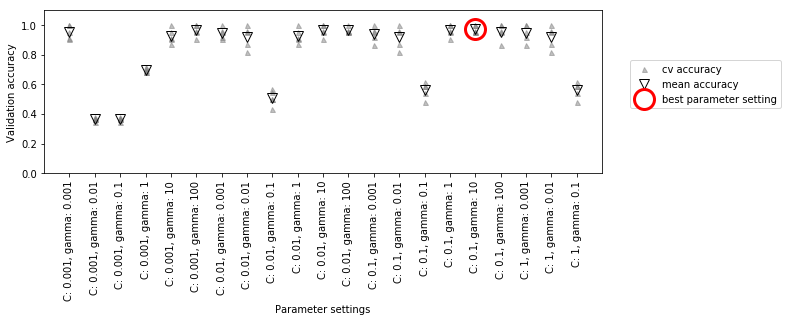

In [32]:
mglearn.plots.plot_cross_val_selection()

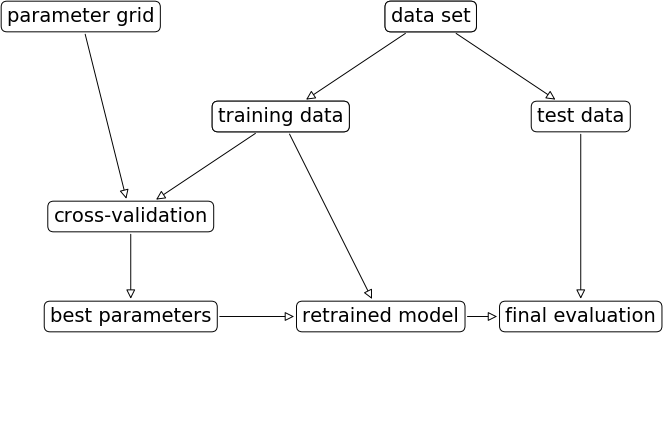

In [34]:
mglearn.plots.plot_grid_search_overview()

In [35]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid: \n{}".format(param_grid))

Parameter grid: 
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(x_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(x_test, y_test)))

Test set score: 0.97


In [38]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


In [39]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### 5.2.3.1 交差検証の結果の解析

In [40]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=Tru

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000726,0.000252,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000122,0.000018,0.011371,0.002852
1,0.000551,0.000241,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000023,0.000042,0.011371,0.002852
2,0.000669,0.000295,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000101,0.000043,0.011371,0.002852
3,0.000548,0.000225,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000017,0.000008,0.011371,0.002852
4,0.000641,0.000238,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000064,0.000031,0.011371,0.002852


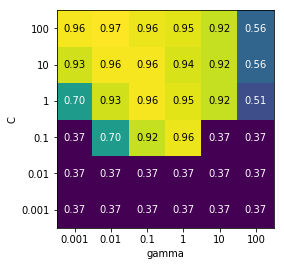

In [42]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel="gamma", xticklabels=param_grid["gamma"], ylabel="C", yticklabels=param_grid["C"], cmap="viridis")

#### 5.2.3.2 グリッドでないサーチ空間

In [43]:
param_grid = [{"kernel": ["rbf"], "C": [0.001, 0.01, 0.1, 1, 10, 100], "gamma": [0.001, 0.01, 0.1, 1, 10, 100]},
             {"kernel": ["linear"], "C": [0.001, 0.01, 0.1, 1, 10, 100]}]

print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [44]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(x_test, y_test)))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97
Test set score: 0.97


In [47]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=Tru

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000730,0.000237,0.366071,0.366079,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000297,0.000027,0.011371,0.002852
1,0.000592,0.000253,0.366071,0.366079,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000037,0.000028,0.011371,0.002852
2,0.000660,0.000279,0.366071,0.366079,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000064,0.000048,0.011371,0.002852
3,0.000599,0.000231,0.366071,0.366079,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000062,0.000016,0.011371,0.002852
4,0.000591,0.000242,0.366071,0.366079,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000039,0.000041,0.011371,0.002852
5,0.000593,0.000243,0.366071,0.366079,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000073,0.000031,0.011371,0.002852
6,0.000597,0.000255,0.366071,0.366079,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000050,0.000031,0.011371,0.002852
7,0.000592,0.000237,0.366071,0.366079,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000057,0.000017,0.011371,0.002852
8,0.000799,0.000284,0.366071,0.366079,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000350,0.000048,0.011371,0.002852
9,0.000669,0.000282,0.366071,0.366079,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000051,0.000043,0.011371,0.002852


#### 5.2.3.3 異なる交差検証手法を用いたグリッドサーチ
#### 5.2.3.4 ネストした交差検証

In [48]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [ 0.96666667  1.          0.9         0.96666667  1.        ]
Mean cross-validation score:  0.966666666667


In [50]:
def nested_cv(x, y, inner_cv, outer_cv, classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(x, y):
        best_params = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(x[training_samples], y[training_samples]):
                clf = classifier(**parameters)
                clf.fit(x[inner_train], y[inner_train])
                score = clf.score(x[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = classifier(**best_params)
        clf.fit(x[training_samples], y[training_samples])
        outer_scores.append(clf.score(x[test_samples], y[test_samples]))
    return np.array(outer_scores)

from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.96666667  1.          0.96666667  0.96666667  1.        ]


## 5.3 評価基準とスコア
### 5.3.1 最終的な目標を見失わないこと
### 5.3.2 2クラス分類における基準
#### 5.3.2.1 エラーの種類
#### 5.3.2.2 偏ったデータセット

In [2]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.dummy import DummyClassifier

digits = load_digits()
y = digits.target == 9

x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

dummy_majority = DummyClassifier(strategy="most_frequent").fit(x_train, y_train)
pred_most_frequent = dummy_majority.predict(x_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(x_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)
pred_tree = tree.predict(x_test)
print("Test score: {:.2f}".format(tree.score(x_test, y_test)))

Test score: 0.92


In [4]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(x_train, y_train)
pred_dummy = dummy.predict(x_test)
print("dummy score: {:.2f}".format(dummy.score(x_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)
print("logreg score: {:.2f}".format(logreg.score(x_test, y_test)))

dummy score: 0.82
logreg score: 0.98


#### 5.3.2.3 混同行列

In [5]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


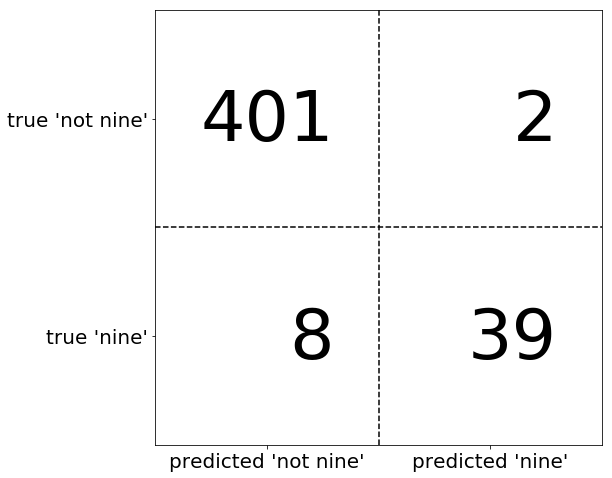

In [8]:
%matplotlib inline
mglearn.plots.plot_confusion_matrix_illustration()

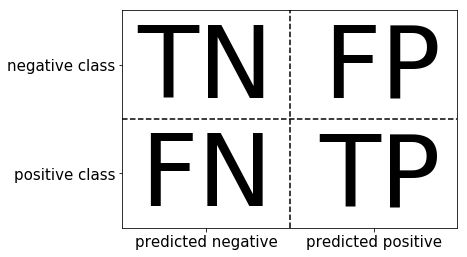

In [9]:
mglearn.plots.plot_binary_confusion_matrix()

In [10]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[367  36]
 [ 41   6]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


In [11]:
from sklearn.metrics import f1_score

print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.13
f1 score tree: 0.55
f1 score logistic regression: 0.89


/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      0.91      0.91       403
       nine       0.14      0.13      0.13        47

avg / total       0.82      0.83      0.82       450

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



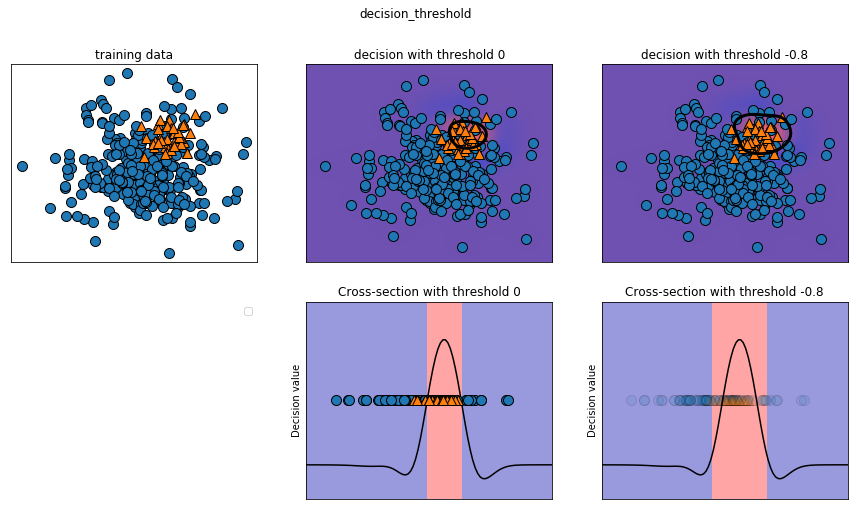

In [16]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC

x, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
svc = SVC(gamma=.05).fit(x_train, y_train)

mglearn.plots.plot_decision_threshold()

In [17]:
print(classification_report(y_test, svc.predict(x_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [19]:
y_pred_lower_threshold = svc.decision_function(x_test) > -.8
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



#### 5.3.2.5 適合率-再現率カーブとROCカーブ

Text(0,0.5,'Recall')

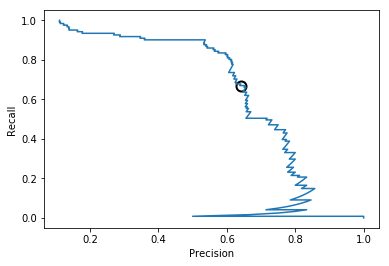

In [23]:
from sklearn.metrics import precision_recall_curve

x, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
svc = SVC(gamma=.05).fit(x_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(x_test))
close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], "o", markersize=10, label="threshold zero", fillstyle="none", c="k", mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

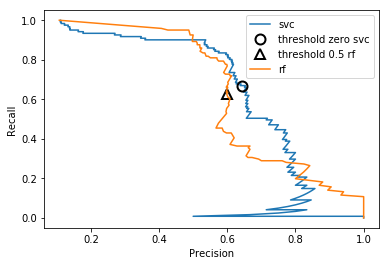

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(x_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(x_test)[:, 1])

plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], "o", markersize=10, label="threshold zero svc", fillstyle="none", c="k", mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], "^", c="k", markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")


In [28]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(x_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(x_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [29]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(x_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(x_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


#### 5.3.2.6 受信者動作特性(ROC)とAUC

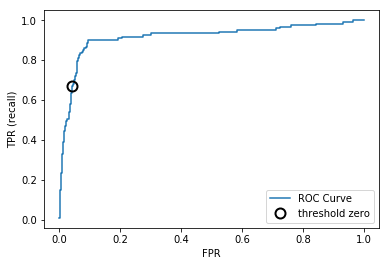

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(x_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize=10, label="threshold zero", fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

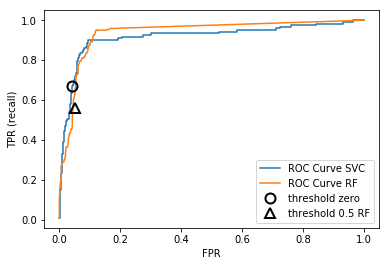

In [31]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(x_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize=10, label="threshold zero", fillstyle="none", c="k", mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], "^", markersize=10, label="threshold 0.5 RF", fillstyle="none", c="k", mew=2)

plt.legend(loc=4)


In [32]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(x_test))
print("AUC for random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00 accuracy = 0.90, AUC = 0.50
gamma = 0.05 accuracy = 0.90, AUC = 1.00
gamma = 0.01 accuracy = 0.90, AUC = 1.00


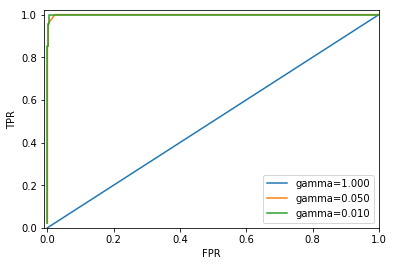

In [33]:
y = digits.target == 9

x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(x_train, y_train)
    accuracy = svc.score(x_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(x_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(x_test))
    print("gamma = {:.2f} accuracy = {:.2f}, AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
    
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

### 5.3.3 多クラス分類の基準

In [34]:
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(x_train, y_train)
pred = lr.predict(x_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


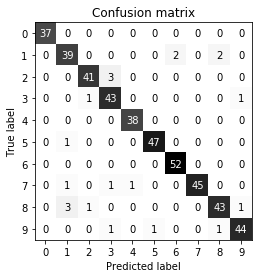

In [35]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel="Predicted label",
    ylabel="True label", xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d"
)
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [36]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [37]:
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.953
Macro average f1 score: 0.954
